# Results And Analysis Of The Dynamical System

## Algorithm

The system is

$$
    \newcommand{\qty}[1]
    {
        \left({#1}\right)
    }
    \newcommand{\qtys}[1]
    {
        \left[{#1}\right]
    }
$$     

\begin{align}
\label{eq:adimetional-diffusion-nernst}
    \frac{\partial \rho_+}{\partial \tau} &= \qty{\nabla^2 \rho_+ - \nabla\qty{\rho_+ \nabla \Psi}}, \\
    \frac{\partial \rho_-}{\partial \tau} &= \frac{\mathcal{D}_-}{\mathcal{D_+}}\qty{\nabla^2 \rho_- + \nabla\qty{\rho_- \nabla \Psi}}, \\
    \nabla^2 \Psi &= \kappa^2\qty{\rho_- - \rho_+}.
\end{align}


With boundary conditions

\begin{align}
    J_+(\xi = 0) &= -\mathcal{D}_+\kappa C_+\qty{\frac{\partial \rho_+}{\partial \xi} - \rho_+ \frac{\partial\Psi}{\partial \xi}}\bigg|_{x= 0}= -k_f C_b\rho_s(\xi = 0, \tau) = - \frac{i_0}{\mathcal{F}}\\
    J_-(\xi = 0) &= -\mathcal{D}_-\kappa C_-\qty{\frac{\partial \rho_-}{\partial x} + \rho_- \frac{\partial\Psi}{\partial \xi}}  \bigg|_{x= 0} = 0\\
    \rho_+(\delta) = 1\\
    \rho_-(\delta) = 1\\
    \Psi(\xi = 0) &= \frac{z\mathcal{F}}{RT} V_0 = \Psi_0\\
    \frac{\partial\Psi}{\partial x}(\xi = 1) &= 0
\end{align}




# Descrete equations

For each species ($s = \pm$) we have

\begin{align}
    C_s^{n+1, k} =& C_s^{n,k} \qty{1 - 2 \alpha + s \alpha \qty{\Psi^{n, k} - \Psi^{n, k-1}}} + \alpha C_s^{n, k+1} \qty{1 - s \qty{\Psi^{n,k+1} - \Psi^{n,k}}} + \alpha C_s^{n,k-1}.\\
    \Psi^{n+1, k+1} - 2\Psi^{n+1,k} + \Psi^{n+1, k-1} =& C_+^{n+1, k} - C_-^{n+1, k}
\end{align}






### Descritizing boundary conditions

Boundary conditions are drawn from the flux and can be found to be (in descrite form)

\begin{align}
\rho_s^{n+1, 0} &= \gamma_s \rho_s^{n+1, 1} - \Delta \xi \gamma_s \bar{i_0},\\
\rho_s^{n+1, M} &= 1,\\
\Psi^{n+1, 0} &= \Psi_0,\\
\Psi^{n+1, M} &= 0,\\
\Psi^{n+1, M} &= \Psi^{n+1, M-1} .
\end{align}

with

\begin{align}
\gamma_+ &= \frac{1}{1 + \frac{\Delta \xi}{\mathcal{D}_+}\frac{k_f}{\kappa} + \qty{\Psi^{n+1, 1}-\Psi^{n+1,0}} }, \\
\gamma_- &= \frac{1}{1 - \qty{\Psi^{n+1, 1}-\Psi^{n+1,0}} }
\end{align}

This equations yield the following boundary equations

$$ k=1 $$

\begin{align}
    \rho_s^{n+1, 1} = \rho_s^{n,1} \qty{1 - 2 \alpha_s + \alpha_s \gamma_s + s \alpha_s \qty{\Psi^{n, 1} - \Psi^{n, 0}}} + \alpha_s \rho_s^{n, 2} \qty{1 - s \qty{\Psi^{n,2} - \Psi^{n,1}}} - \alpha\bar{i_0}\delta_{s,+},\\
    \Psi^{n+1, 2} - 2\Psi^{n+1,1} + \Psi^{n+1, 0} =& \Delta \xi^2\qty{C_+^{n+1, 1} - C_-^{n+1, 1}}.
\end{align}


$$ k = m-1 $$

\begin{align}
    \rho_s^{n+1, m-1} = \rho_s^{n,m-1} \qty{1 - 2 \alpha_s + s \alpha_s \qty{\Psi^{n, m-1} - \Psi^{n, m-2}}} + \alpha_s \rho_s^{n, m} \qty{1 - s \qty{\Psi^{n,m} - \Psi^{n,m-1}}},\\
    \Psi^{n+1, 2} - 2\Psi^{n+1,1} + \Psi^{n+1, 0} = \Delta \xi^2 \qty{C_+^{n+1, 1} - C_-^{n+1, 1}}.  
\end{align}




### Matrix equations

We can write the system as follows

\begin{align}
\underline{\rho_s^{n+1}} = (\bf{A} + s\alpha_s\bf{B}(\Psi^{n}) ) \cdot \underline{\rho_s^{n}} + \alpha_s\bf{b_s}\\
\bf{D} \underline{\Psi}^{n+1} = \Delta \xi ^2\qty{\underline{\rho_-}^{n+1} - \underline{\rho_+}^{n+1}}- \underline{b}_{\Psi}
\end{align}


where

\begin{align}
A = \begin{bmatrix}
    1 - 2 \alpha + \alpha \gamma_s   &  \alpha   & 0  &   \cdots & 0   &   0   &   0   &   0 \\
    \alpha    &   1 - 2 \alpha       &  \alpha   & 0  & \cdots   & 0   &   0   &   0 \\
    0         & \alpha               &  1 - 2 \alpha  & \alpha   & \cdots   &   0   &   0   &   0 \\
    \vdots    &  \vdots              &\vdots          &  \vdots  & \vdots   &\vdots & \vdots & \vdots \\ 
    0         &  0                   &  \cdots        &  0       &  \alpha    &  1-2\alpha &    \alpha   &    0 \\
0         &  0                   &  \cdots        &  0           &  0         &     0      &  \alpha    &  1-2\alpha 
\end{bmatrix}
\end{align}

,

\begin{align}
B(\Psi) = \begin{bmatrix}
    \qty{\Psi^{n,1} - \Psi^{n, 0}}   &  -\qty{\Psi^{n,2} - \Psi^{n, 1}}   & 0  &   \cdots & 0   &   0   &   0   &   0 \\
    0                                &  \qty{\Psi^{n,1} - \Psi^{n, 0}}    & -\qty{\Psi^{n,2} - \Psi^{n, 1}}   & 0  & \cdots   & 0   &   0   &   0 \\
    0         & 0                    &  \qty{\Psi^{n,2} - \Psi^{n, 1}}    & -\qty{\Psi^{n,3} - \Psi^{n, 2}} & \cdots    &   0   &   0 \\
    \vdots    &  \vdots              &\vdots          &  \vdots  & \vdots   &\vdots & \vdots & \vdots \\ 
    0         &  0                   &  \cdots        &  0       &  0         &  0         & \qty{\Psi^{n,M-2} - \Psi^{n, M-3}}   & -\qty{\Psi^{n,M-1} - \Psi^{n, M-2}} \\
0         &  0                   &  \cdots        &  0           &  0         &     0      &  0    &  \qty{\Psi^{n,M-1} - \Psi^{n, M-2}}
\end{bmatrix}
\end{align}

and
\begin{align}
D = \begin{bmatrix}
    -2   &  1   & 0  &   \cdots & 0   &   0   &   0   &   0 \\
    1    &  -2    & 1   & 0  & \cdots   & 0   &   0   &   0 \\
    0         & 1                    &  -2   & 1 & \cdots    &   0   &   0 \\
    \vdots    &  \vdots              &\vdots          &  \vdots  & \vdots   &\vdots & \vdots & \vdots \\ 
    0         &  0                   &  \cdots        &  0       &  0         &  0         & -2   & 1 \\
0         &  0                   &  \cdots        &  0           &  0         &     0      &  1    &  -2
\end{bmatrix}.
\end{align}

\begin{align}
    b_\Psi = \begin{bmatrix}
        \Psi_0\\
        0\\
        \vdots\\
        0
    \end{bmatrix}
\end{align}

\begin{align}
    b_s = \begin{bmatrix}
        \bar{i_0}\Delta\xi\\
        0\\
        \vdots\\
        0\\
        1
    \end{bmatrix}
\end{align}

We define matrix $\bf{Z}$ as

\begin{align}
    Z_s = A_s + s\alpha B(\underline{\Psi})
\end{align}

In [3]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
import math
from decimal import Decimal
import matplotlib
import json

with open('../ch03/code/model_parameters.json', 'r') as file:
    params = json.loads(file.read())

In [21]:
class Model():
    def __init__(self, params):
        #Model Parameters
        self.Cb = params['bulkConcentration']
        self.D = params['diffusionCoefficientScale']
        self.d = params['laminarFlowRegion']
        self.kf = params['reactionRate']
        self.z = params['z']
        self.F = params['Fa']
        self.R = params['R']
        self.T = params['T']
        self.V0 = params['V0']
        self.epsilon = params['epsilon']
        self.kappa =  np.sqrt(( ( self.z * self.F  ) ** 2 * self.Cb ) / ( self.epsilon * self.R * self.T ) )
        self.Psi0 = self.z * self.F * params['V0'] / ( self.R * self.T )
        self.D1 = self.D * params["D1"]
        self.D2 = self.D * params["D2"]
        self.N = 30000
        self.M = 100
        self.i0 = -params['current']
        self.length = params["length"]
        self.xi = np.linspace(0,params["length"], self.M)
        self.tau = np.linspace(0,params["timespan"], self.N) #shape is N+1

        #Grid Parameters
        self.dtau = params["timespan"]/(self.N)  # N Partitions
        self.dxi = self.length/(self.M) # M Partitions 
        self.a1 = self.dtau / self.dxi ** 2 
        self.a2 = self.dtau / self.dxi ** 2 * self.D2/self.D1

        #Plotting parameters

    def build(self):
        M = self.M
        N = self.N
        a1 = self.a1
        a2 = self.a2
        Psi0 = self.Psi0
        kappa = self.kappa
        kf = self.kf
        dxi = self.dxi
        D1 = self.D1 
        D2 = self.D2
        Fa = self.F
        i0 = self.i0
        # Define the coefficient matrix
        g1 = 1 / ( 1 + kf * dxi / ( D1 * kappa ) +  Psi0)
        di1 = ( 1 - 2 * a1 ) * np.ones(M-2)
        di1[0] = ( 1 - 2 * a1 + a1 * g1 )
        A1 = diags(np.array([ a1 * np.ones(M-3), di1, a1 * np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()

        g2 = 1 / ( 1 - Psi0 )
        di2 = ( 1 - 2 * a2 ) * np.ones(M-2)
        di2[0] = ( 1 - 2 * a2 + a2 * g2 )
        A2 = diags(np.array([ a2 * np.ones(M-3), di2, a2 * np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()

        B1 = np.zeros([M-2, M-2])
        B2 = np.zeros([M-2, M-2])

        D0 = diags(np.array([ np.ones(M-3), -2 * np.ones(M-2), np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()
        Dinv = np.asarray(np.linalg.inv(D0))

        b1 = np.zeros(M-2)
        b1[0] = -i0 * dxi / ( Fa * kf * D1 * kappa ) 
        b1[-1] = a1 
        b2 = np.zeros(M-2)
        b2[-1] = a2

        bPsi = np.zeros(M-2)
        bPsi[0] = Psi0

        def B(s, Psi, n):
            diag =  (Psi[n, 1:M-1 ] - Psi[n, 0:M-2 ])
            diag2 =  (Psi[n, 1:M-2 ] - Psi[n, 2:M-1 ])
            PsiMatrix = diags(np.array([ diag , diag2 ]), [0, 1], shape=(M-2, M-2)).toarray()
            if s == 1:
                return  -1 * a1 * PsiMatrix
            if s == -1:
                return a2 * PsiMatrix
        # Set up initial conditions for C

        rho1 = np.zeros([N, M])
        rho2 = np.zeros([N, M])
        Psi = np.zeros([N, M])
        E = np.zeros([N, M-1])

        rho1[0, :] = 0
        rho1[0, -1] = 1    

        rho2[0, :] = 0
        rho2[0, -1] = 1  

        Psi[0, :] = 0
        Psi[0, 0] = Psi0

        
        #Starting iteration
        for n in range(0, N-1):

             # Update border condition
            g1 = 1 / ( 1 - (Psi[n,1]- Psi0))
            A1[0,0] = ( 1 - 2 * a1 + g1 * a1 )

            g2 = 1 / ( 1 + (Psi[n, 1] - Psi[n,0]))
            A2[0,0] = ( 1 - 2 * a2 + g2 * a2 )

            rho1[n+1, 1:M-1] = np.matmul(A1, rho1[n, 1:M-1])  + b1 + np.matmul(B(1, Psi, n), rho1[n, 1:M-1])
            rho1[n+1, 0] = g1 * rho1[n+1, 1]
            rho1[n+1, -1] = 1

            rho2[n+1, 1:M-1] = np.matmul(A2, rho2[n, 1:M-1]) + b2 + np.matmul(B(-1, Psi, n), rho2[n, 1:M-1]) 
            rho2[n+1, 0] = g2 * rho2[n+1, 1]
            rho2[n+1, -1] = 1

            Psi[n+1, 1:M-1] = np.matmul(Dinv, dxi * (rho2[n+1, 1:M-1] - rho1[n+1, 1:M-1]) -bPsi )
            Psi[n+1, 0] = Psi0
            Psi[n+1, -1] = 0
        
            E[n+1,0:M-1] = - self.kappa * (Psi[n+1,1:M] -  Psi[n+1,:M-1])/dxi
            
        print("Build Complete")
        self.rho1 = rho1
        self.rho2 = rho2
        self.Psi = Psi
        self.E = self.R * self.T * E/ (self.z * self.F)

        
    def remove_points(self, A, n):
        #n is the number of steps to skip
        if n >= 4:
            A = np.delete(A, [1, 2, 3])

        for i in range(0,int(len(A)/4)):
            index = i+n
            A = np.delete(A, [index-2, index-1, index])
        return A
    
    #Cm is the imported analytical solution
    def plot(self, tau, f, imageName='langmuir-diffusion-nernst'):
        
        self.imageName = imageName# + str(t)[-3:]
        Cb = self.Cb
        dtau = self.dtau
        C1 = Cb * self.rho1
        C2 = Cb * self.rho2

        if(f == 'E'):
            func = self.E
            ylabel = r'Electric Field (V/m)' 
            title = ''#'Electric Field In The Diffusion Problem With Nernst Interaction.'
        elif(f == 'phi'):
            func = self.R * self.T * self.Psi / (self.z * self.F)
            ylabel = r'Electric Potential (V)'
            title = ''#'Electric Potential In The Diffusion Problem With Nernst Interaction.'
             # this is done to avoid cluttering of numeric points over the analytic solution
        else:
            print("Unkown function. Need something real to plot")
            return -1
        
        kappa = self.kappa
        D1 = self.D1 
        mw = 4
        skip = 4
        
        xi2 = self.xi
        xi2 = xi2 / kappa * 1e9#* nanometerScale #change the scale of the scale to nanometer
        
        to_molar = 1e3
        for i in range(len(tau)):
            
            plt.figure(1)
            plt.style.use('thesis')

            fig, ax2 = plt.subplots()

            #color = 'tab:blue'
            ax2.tick_params(axis='y')#, labelcolor=color)
            ax1 = ax2.twinx() 
            #color = 'tab:red'

            plt.title(title, fontweight='bold')

            n = int(t[i]/dtau)
        
            ax1.plot(xi2, to_molar * C1[n, :], 'g^', label=r'$C_+$, $t =%.2f \mu s$' % Decimal(tau[i] * 1e6/ ( self.D1 * kappa ** 2 ) ))
            ax1.plot(xi2, to_molar * C2[n, :],'r^', label=r'$C_-$,  $t =%.2f \mu s$' % Decimal(tau[i] * 1e6/ ( self.D1 * kappa ** 2 ) ))
            ax1.legend(loc='upper left')
            if f == 'E':
                ax2.plot(xi2[0:self.M-1], func[n, :], 'b^' ,color='tab:blue', label=r'$\phi$,  $t = %.2f \mu s$' % Decimal(tau[i] * 1e6/ ( self.D1 * kappa ** 2 ) ))
            if f == 'phi':
                ax2.plot(xi2, func[n, :], 'b^', color='tab:blue', label=r'$\phi$,  $t =%.2f \mu s$' % Decimal(tau[i] * 1e6 / ( self.D1 * kappa ** 2 ) ))

            ax1.set_xlabel(r'Distance from the interface plate (nm)')
            ax1.set_ylabel(r'Molar Concentration')
            ax2.set_ylabel(ylabel)
            ax2.tick_params(axis='y')#, labelcolor=color)
            

            ax2.legend(loc=(0.01,  0.85))


            ################################## Plot parameters ##################################
            textstr = '\n'.join((
                r'$V_0=%.2f V$' % Decimal(self.V0),
                r'$k_f=%.2f m/s$' % Decimal(self.kf),
                r'$\kappa=%.2f nm^{-1}$' % Decimal(self.kappa /1e9),
                r'$C_b=%.2f M$' % Decimal(to_molar * self.Cb),))


            props = dict(boxstyle='round', facecolor='white', alpha=0.5)
            ax1.text(0.02, 0.8, textstr, fontsize=30, verticalalignment='top', bbox=props)
            
            
            fig.tight_layout()  # otherwise the right y-label is slightly clipped
            
            print("saving to:"+'../../img/forced'+ imageName + f + str(i) +'.eps')
            plt.savefig('../../img/forced'+ self.imageName + f + str(i) +'.eps')
    
            #plt.show()

    

# Electric potential And Field As A Function Of Time

We plot the electric potential and electric field as a function of time.

In [22]:
params0 = params
model0 = Model(params0)

In [23]:
model0.build()

/Users/creative-work/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in subtract


Build Complete


saving to:../../img/langmuir-diffusion-nernstE0.eps
saving to:../../img/langmuir-diffusion-nernstE1.eps
saving to:../../img/langmuir-diffusion-nernstE2.eps
saving to:../../img/langmuir-diffusion-nernstE3.eps


<Figure size 1440x1152 with 0 Axes>

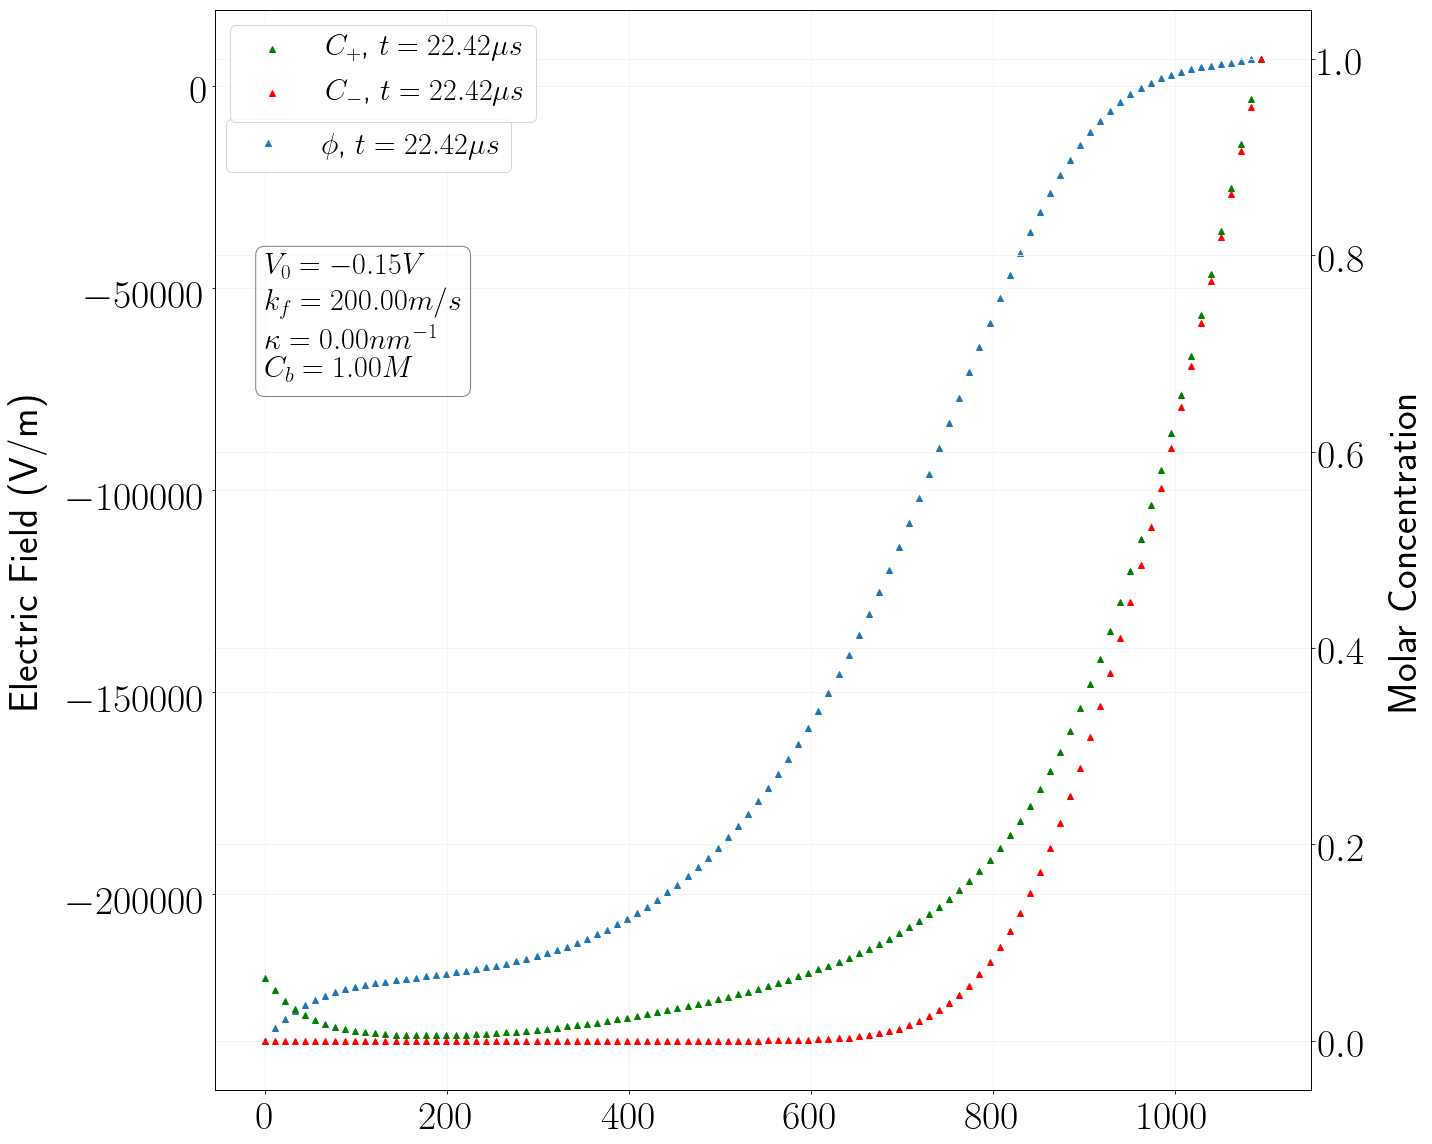

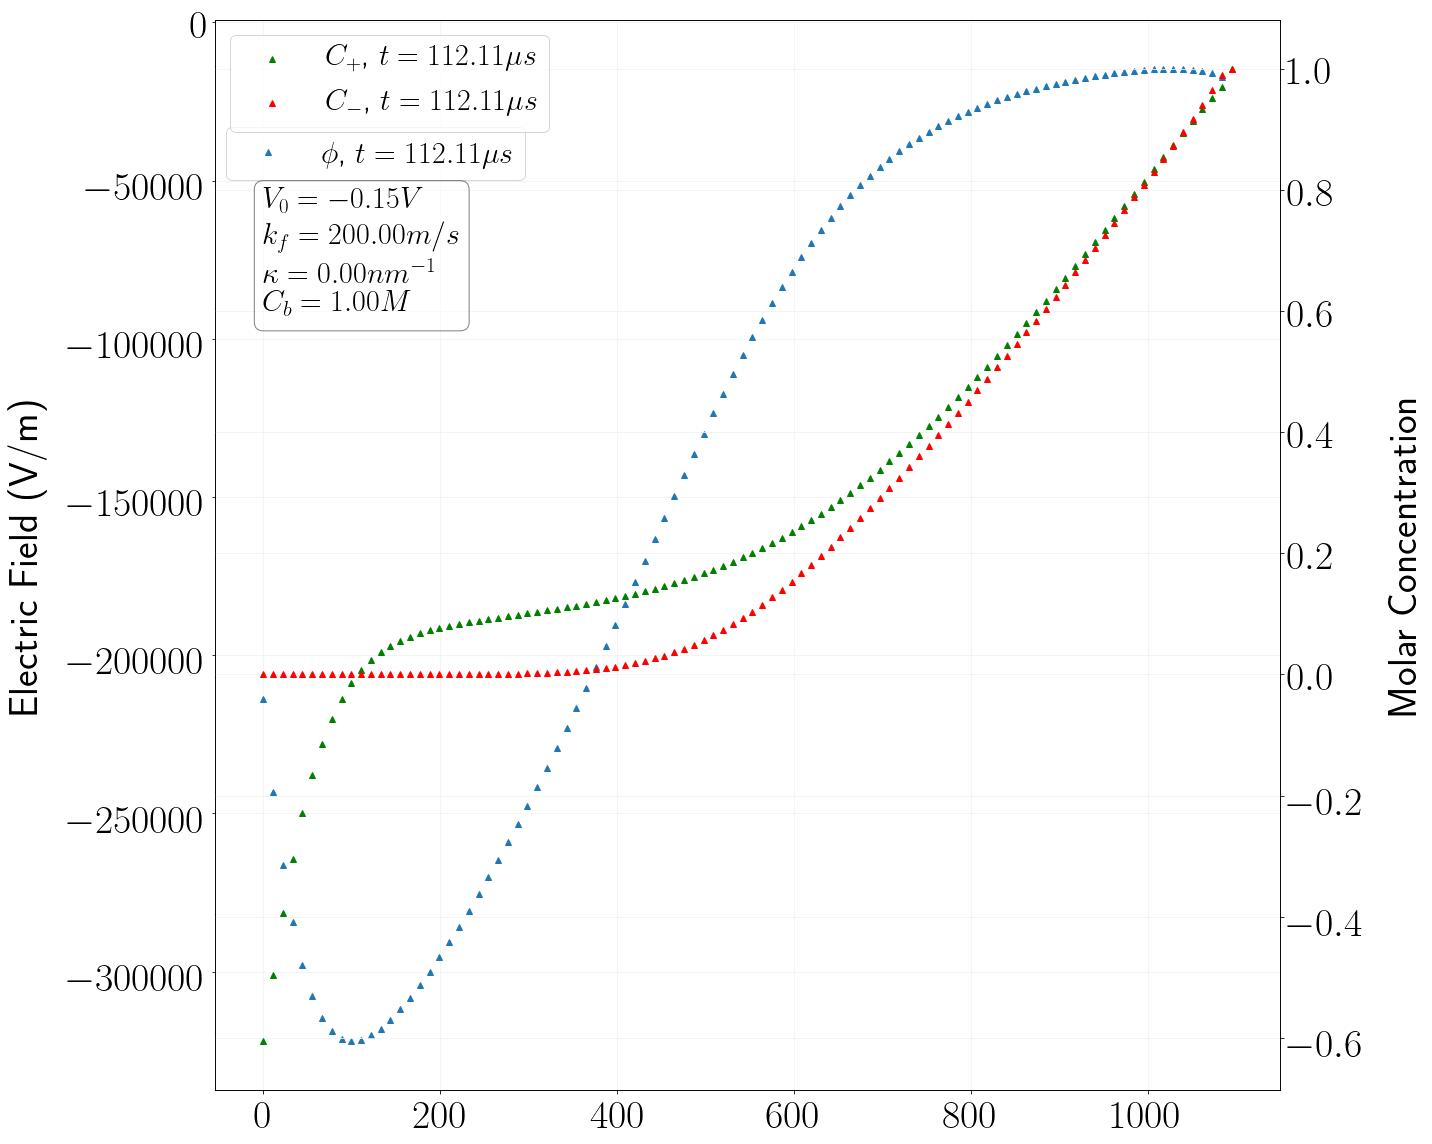

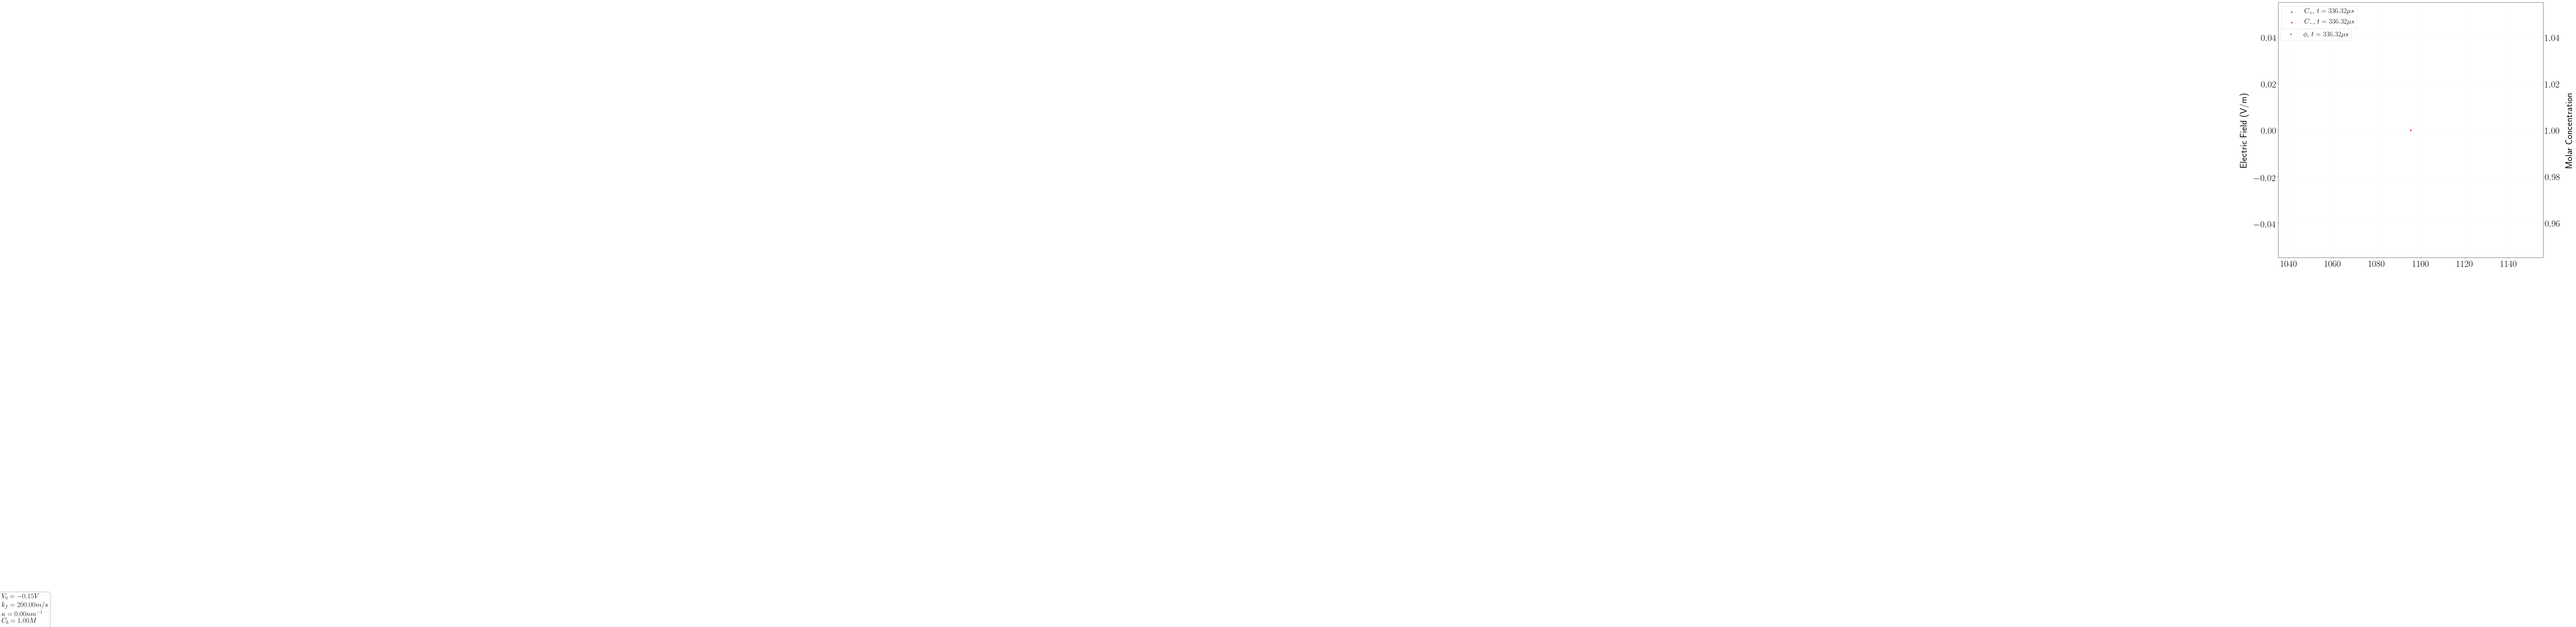

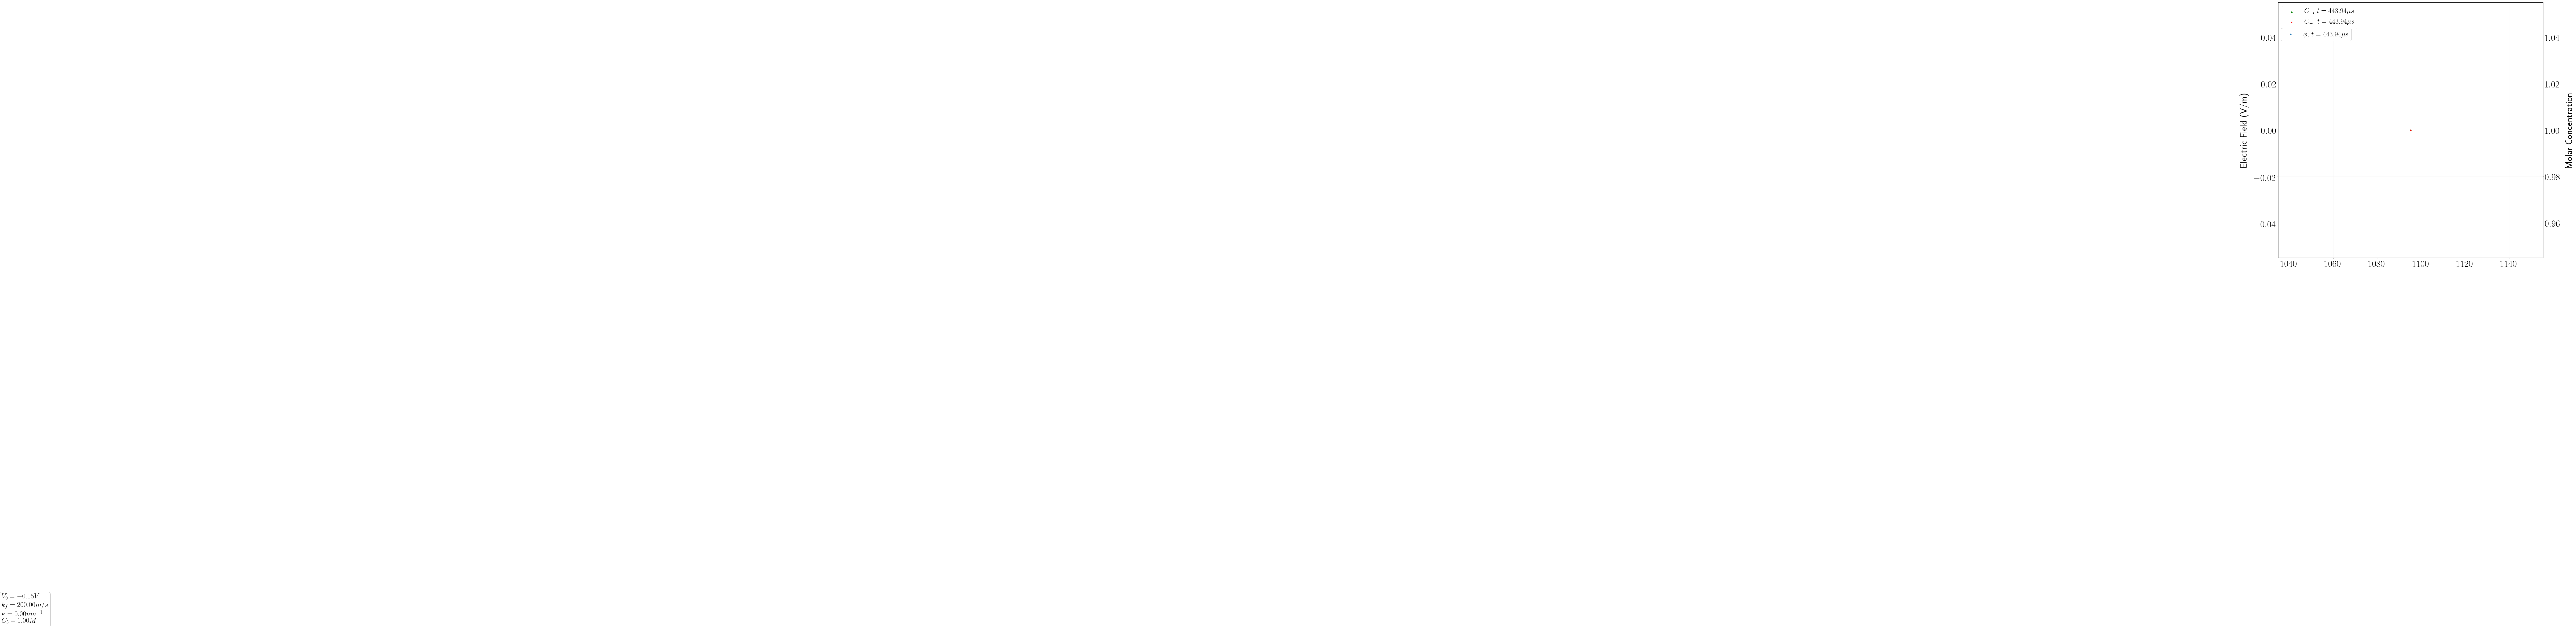

In [24]:
t = [0.5, 2.5, 7.5,9.9]
model0.plot(t,'E')

saving to:../../img/langmuir-diffusion-nernstphi0.eps
saving to:../../img/langmuir-diffusion-nernstphi1.eps
saving to:../../img/langmuir-diffusion-nernstphi2.eps
saving to:../../img/langmuir-diffusion-nernstphi3.eps


<Figure size 1440x1152 with 0 Axes>

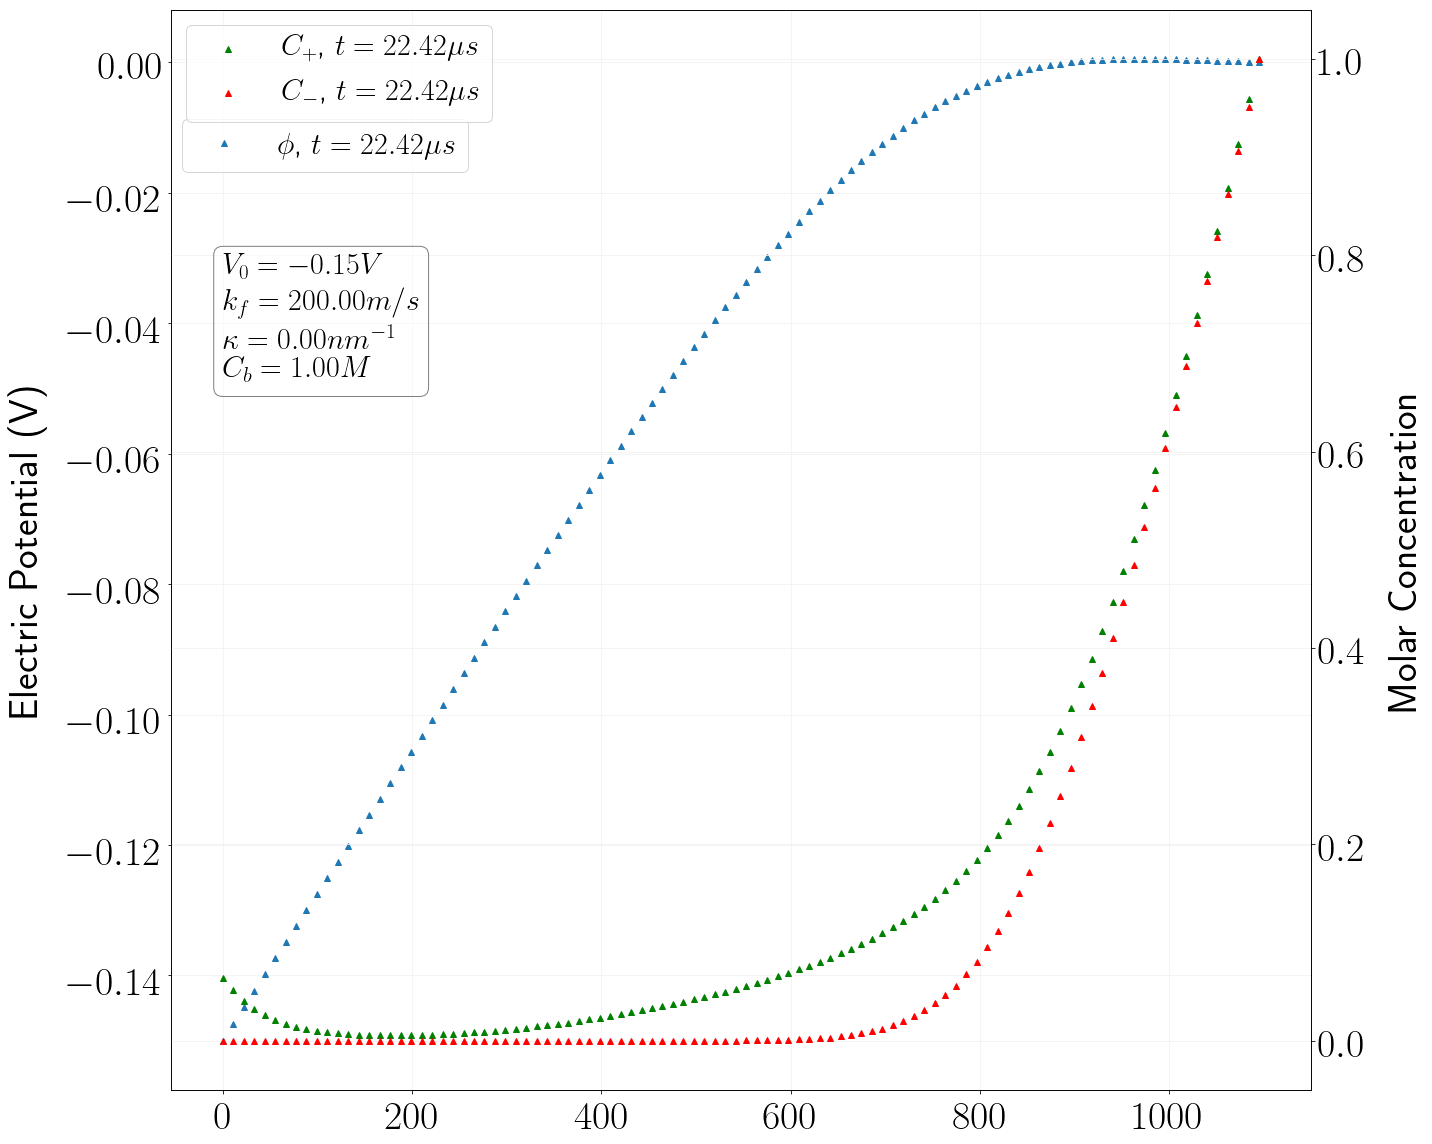

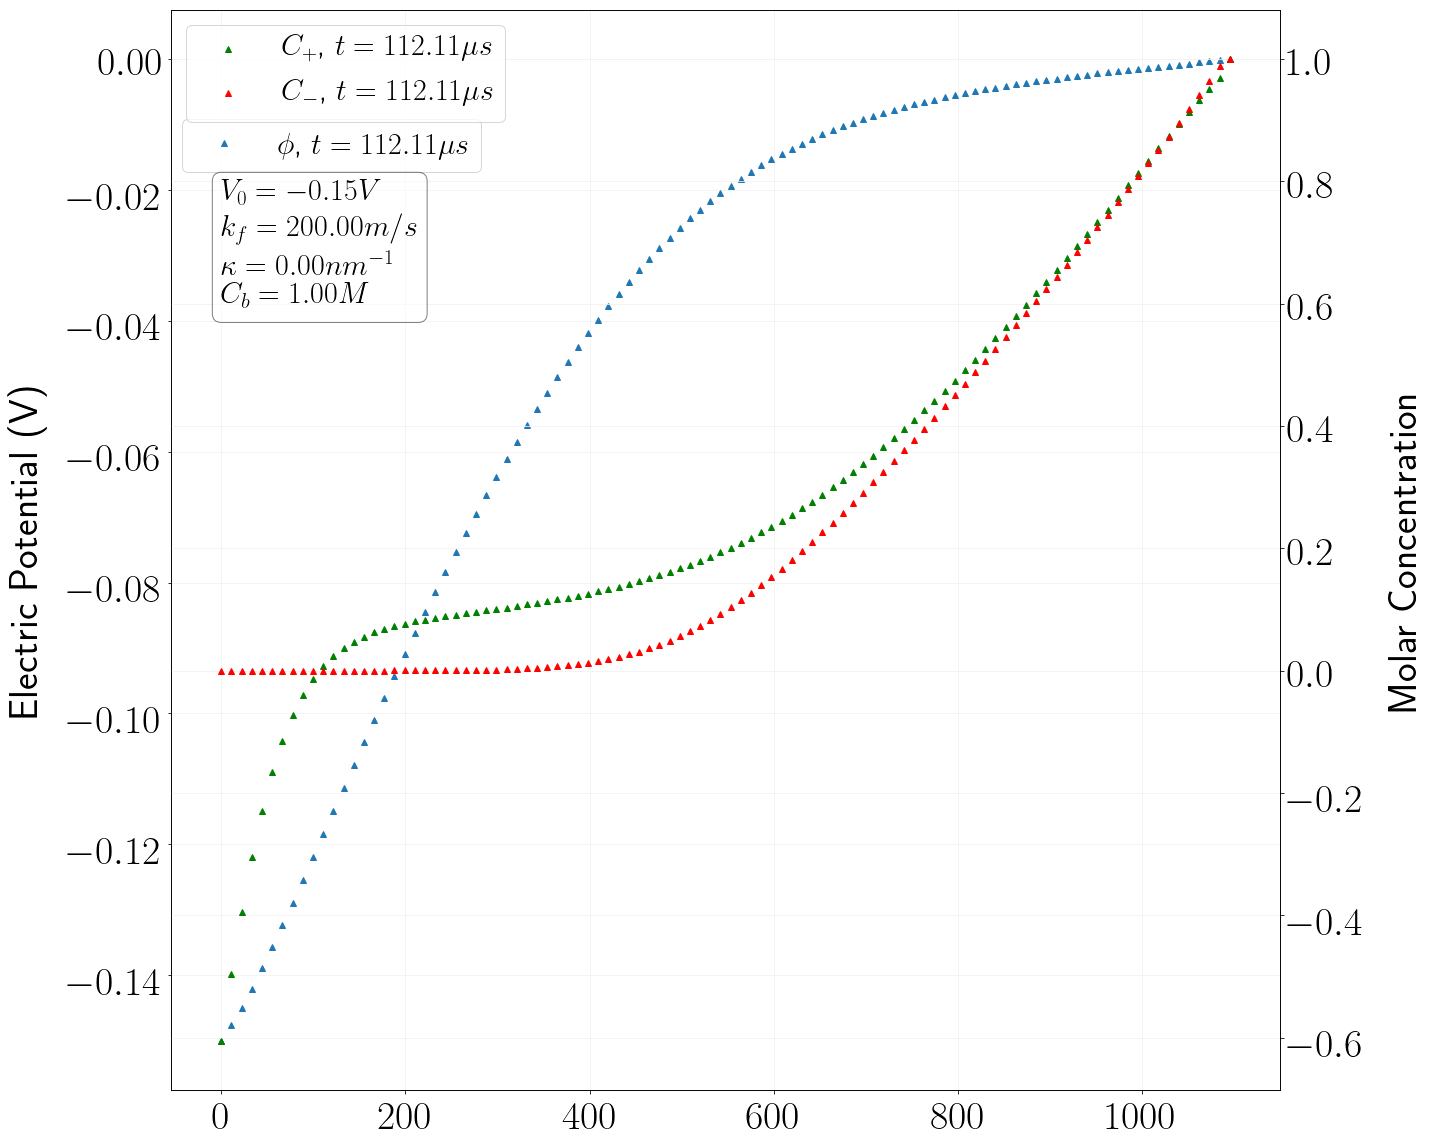

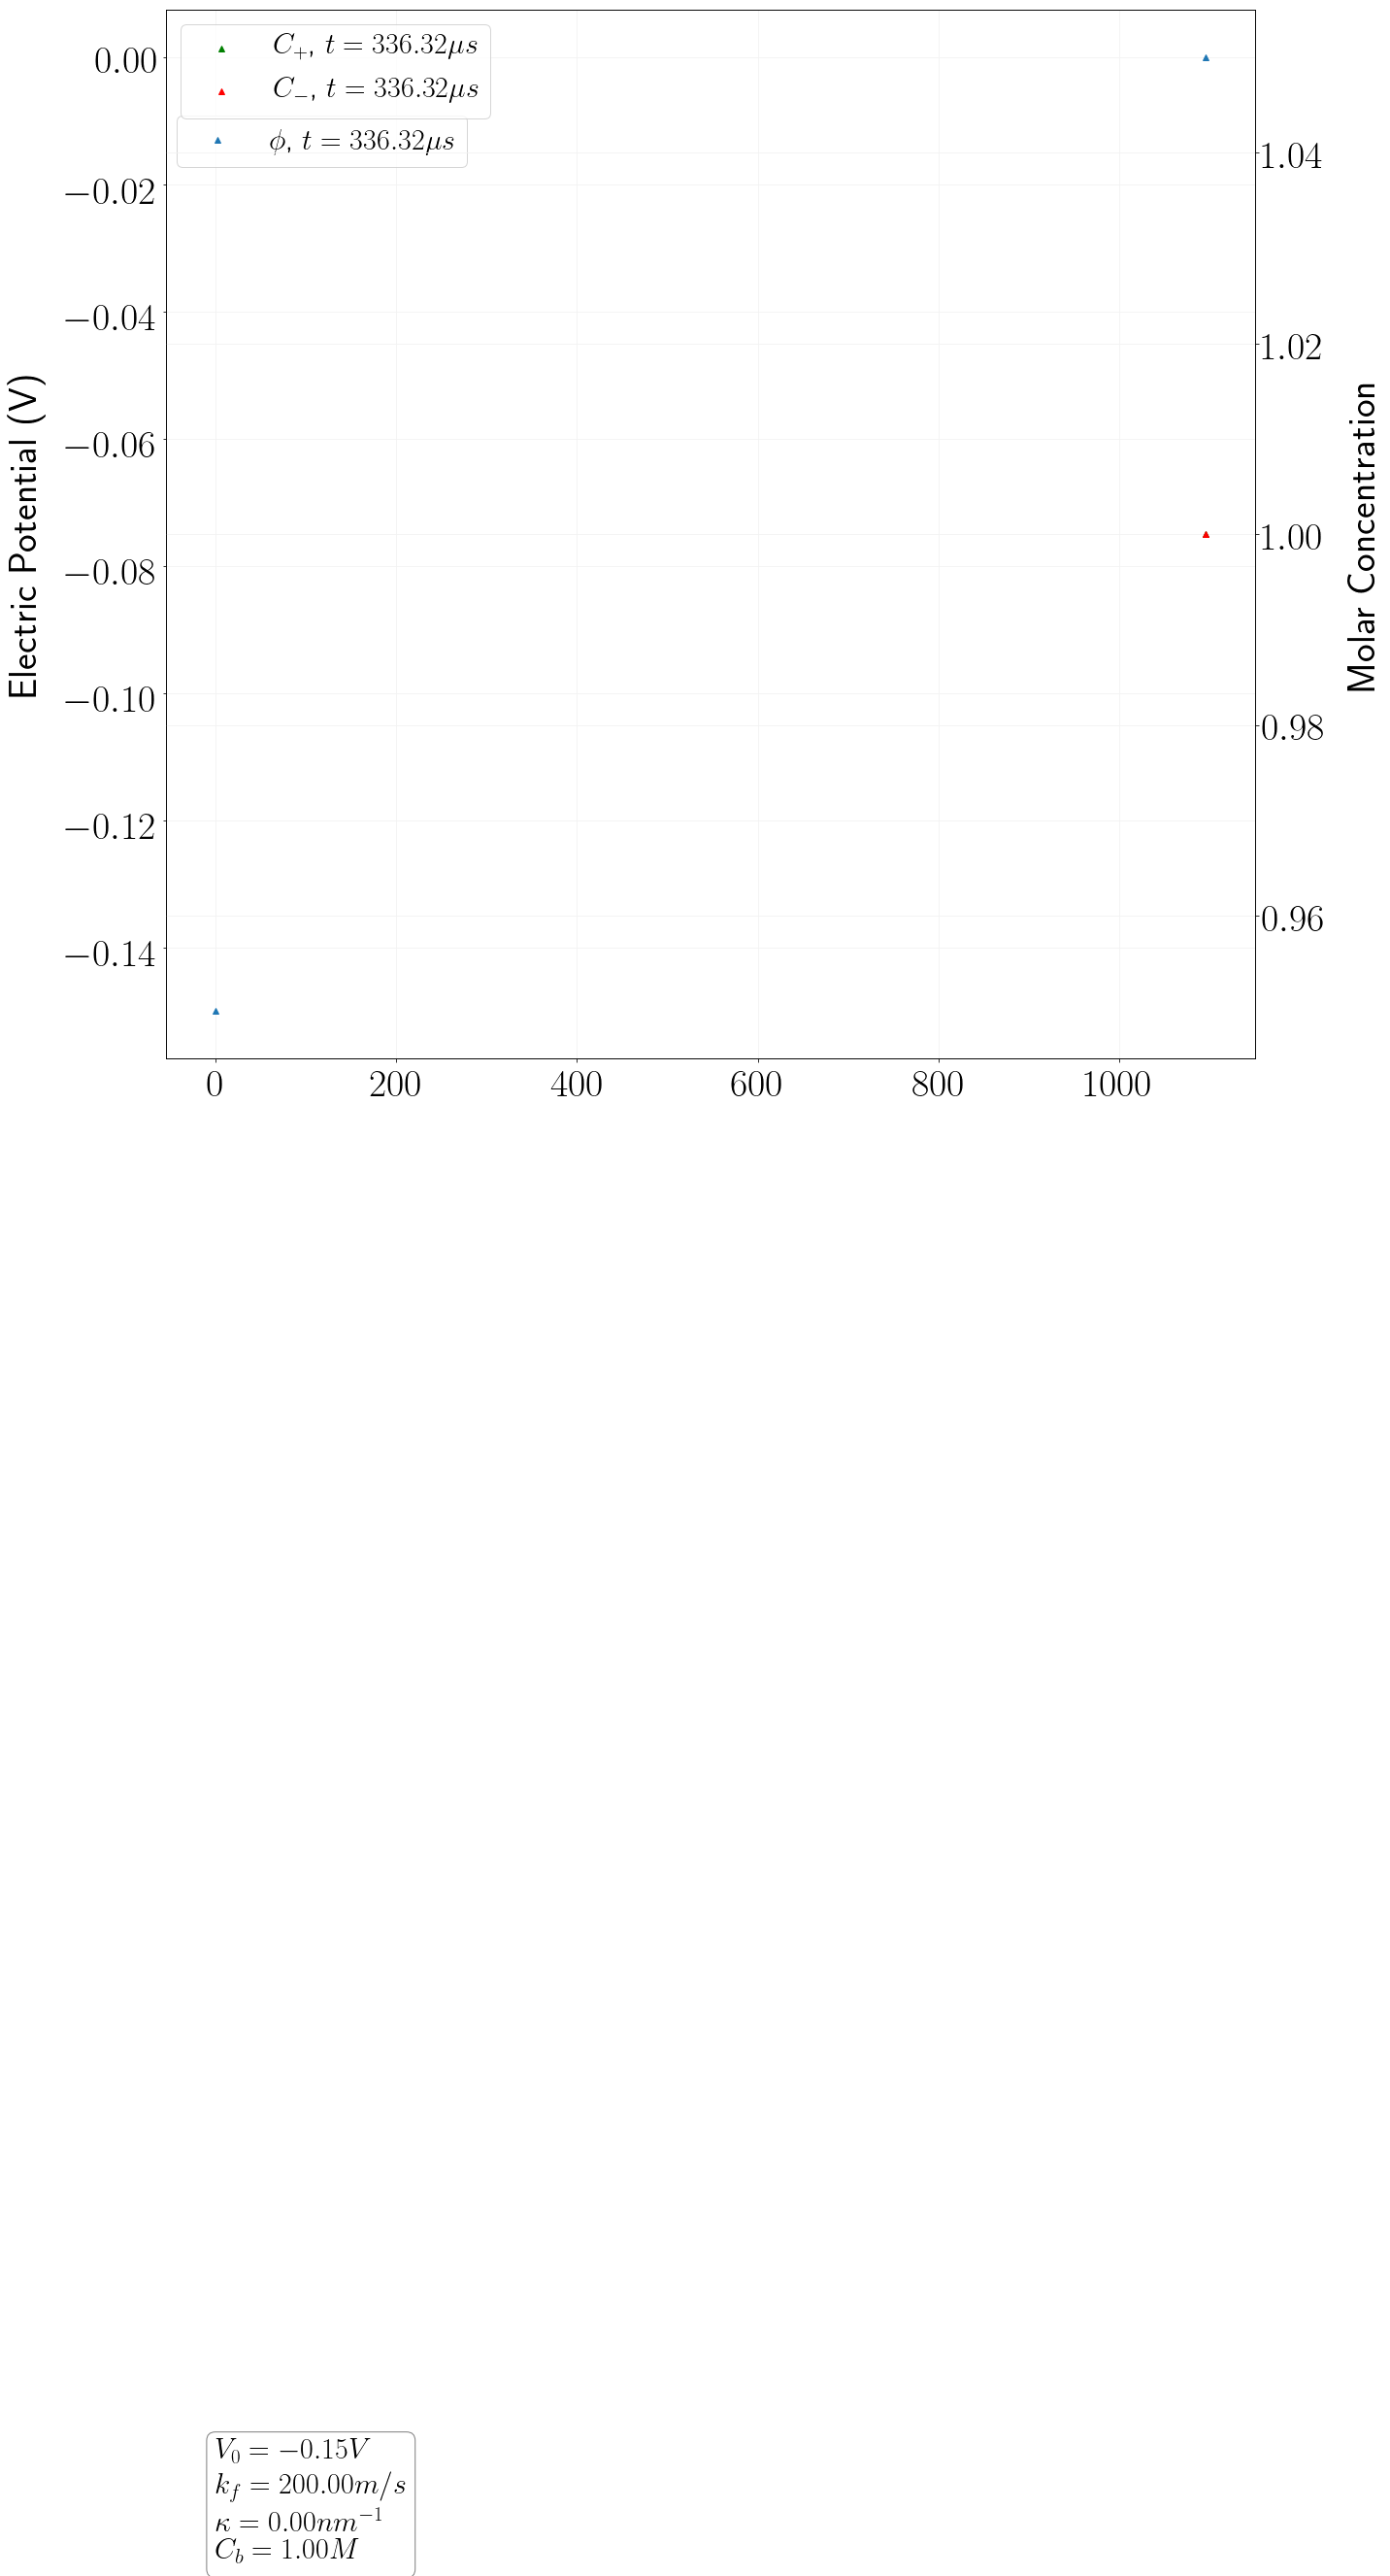

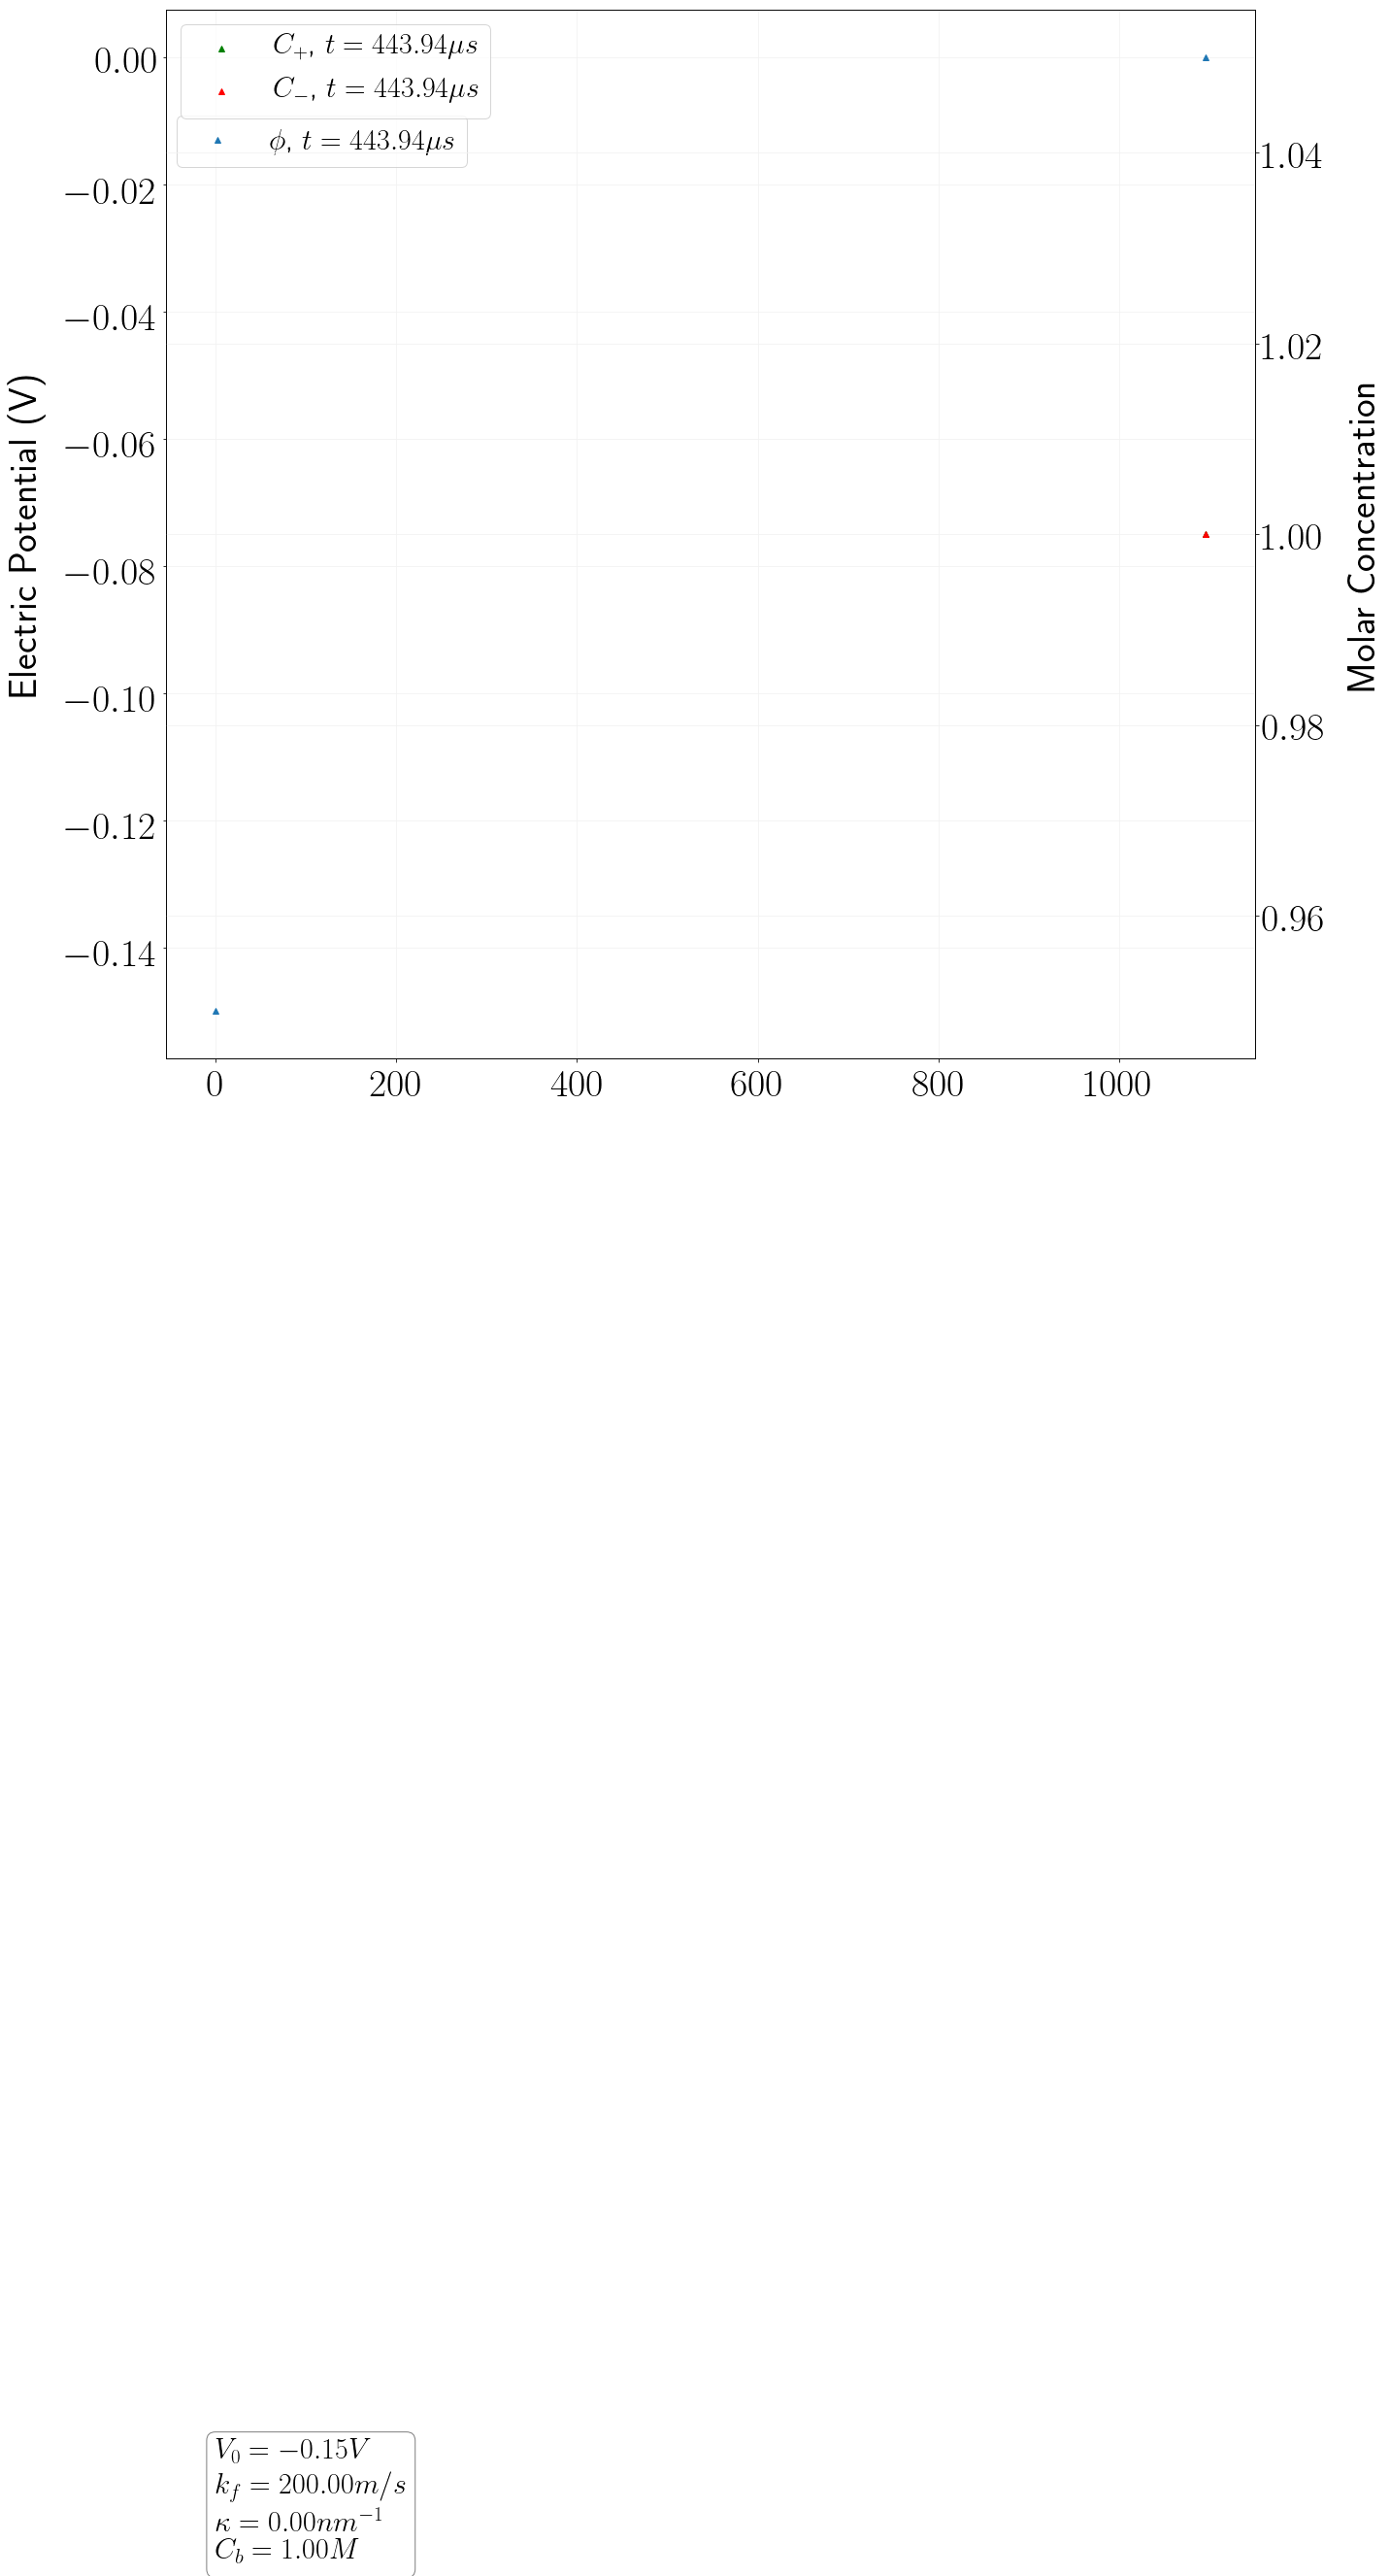

In [25]:
model0.plot(t,'phi')


## Electric field as a function of Cb





In [7]:
numPoints = 50
Cb = np.linspace(0, 1.4, numPoints)
surfE_C = []
aux1 = []
aux2 = []
aux3 = []
t = [0.1, 0.5, 0.7]
params1 = params
for i in range(len(Cb)):
    C = i
    params1['bulkConcentration'] = C
    model3 = Model(params1)
    model3.build()
 
    n = int(t[0]/model3.dtau)
    aux1.append(model3.E[n,0])
    n = int(t[1]/model3.dtau)
    aux2.append(model3.E[n,0])
    n = int(t[2]/model3.dtau)
    aux3.append(model3.E[n,0])
    
surfE_C.append([aux1, aux2, aux3])

surfE_C =np.array(surfE_C)/1e6
surfE_C = np.array(surfE_C)

/Users/creative-work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in double_scalars
/Users/creative-work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:98: RuntimeWarning: divide by zero encountered in double_scalars


Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete


In [8]:
surfE_v = []
aux1 = []
aux2 = []
aux3 = []
v = np.linspace(-1.5, 0, numPoints)
params1['bulkConcentration'] = 1e-3
for i in range(0,len(v)):
    V0 = v[i]
    params1["V0"] = V0
    model4 = Model(params1)
    model4.build()
    n = int(t[0]/model4.dtau)
    aux1.append(model4.E[n,0])
    n = int(t[1]/model4.dtau)
    aux2.append(model4.E[n,0])
    n = int(t[2]/model4.dtau)
    aux3.append(model4.E[n,0])
    
surfE_v.append([aux1, aux2, aux3])
surfE_v = np.array(surfE_v)

Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete
Build Complete


In [11]:
with open('surfE_v.txt', 'w') as v_file:
    for value in surfE_v:
        v_file.write(str(value))
with open('surfE_v.txt', 'w') as c_file:
    for value in surfE_C:
        c_file.write(str(value))

No handles with labels found to put in legend.


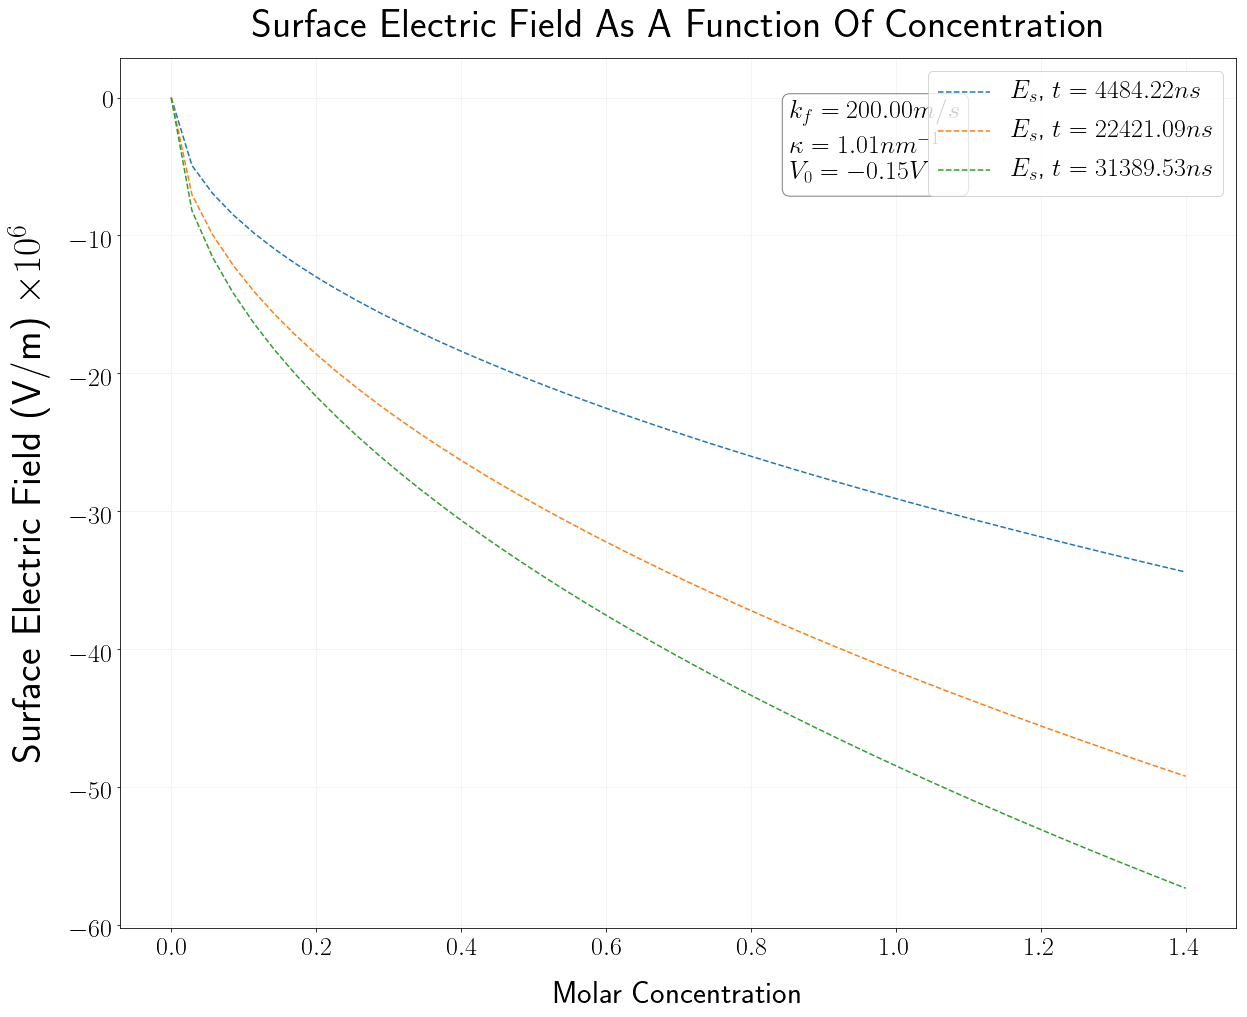

In [12]:
fig, ax1 = plt.subplots()

mw = 4
fs = 26
skip = 4
t = [0.1, 0.5, 0.7]
plt.style.use('thesis')
plt.title('Surface Electric Field As A Function Of Concentration')
plt.legend(loc='upper left')
for i in range(len(t)):

    plt.plot(Cb, surfE_C[0][i], '--', label=r'$E_s$,  $t =%.2f ns$' % Decimal(t[i] * 1e9/ ( model4.D1 * model4.kappa ** 2 ) ))
    
plt.xlabel(r'Molar Concentration', fontsize=fs+5)
plt.ylabel(r'Surface Electric Field (V/m) $\times 10^6$')
textstr = '\n'.join((
                r'$k_f=%.2f m/s$' % Decimal(model3.kf),
                r'$\kappa=%.2f nm^{-1}$' % Decimal(model3.kappa/1e9),
                r'$V_0=%.2f V$' % Decimal(model3.V0),))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.6, 0.95, textstr, transform=ax1.transAxes, fontsize=fs, verticalalignment='top', bbox=props)
plt.legend(loc='upper right', fontsize = fs)
plt.xticks(size = fs)
plt.yticks(size = fs)
plt.savefig('../../img/surfaceEfield_Cb.eps', dpi=1000, fontweight='bold')
#plt.show()

No handles with labels found to put in legend.


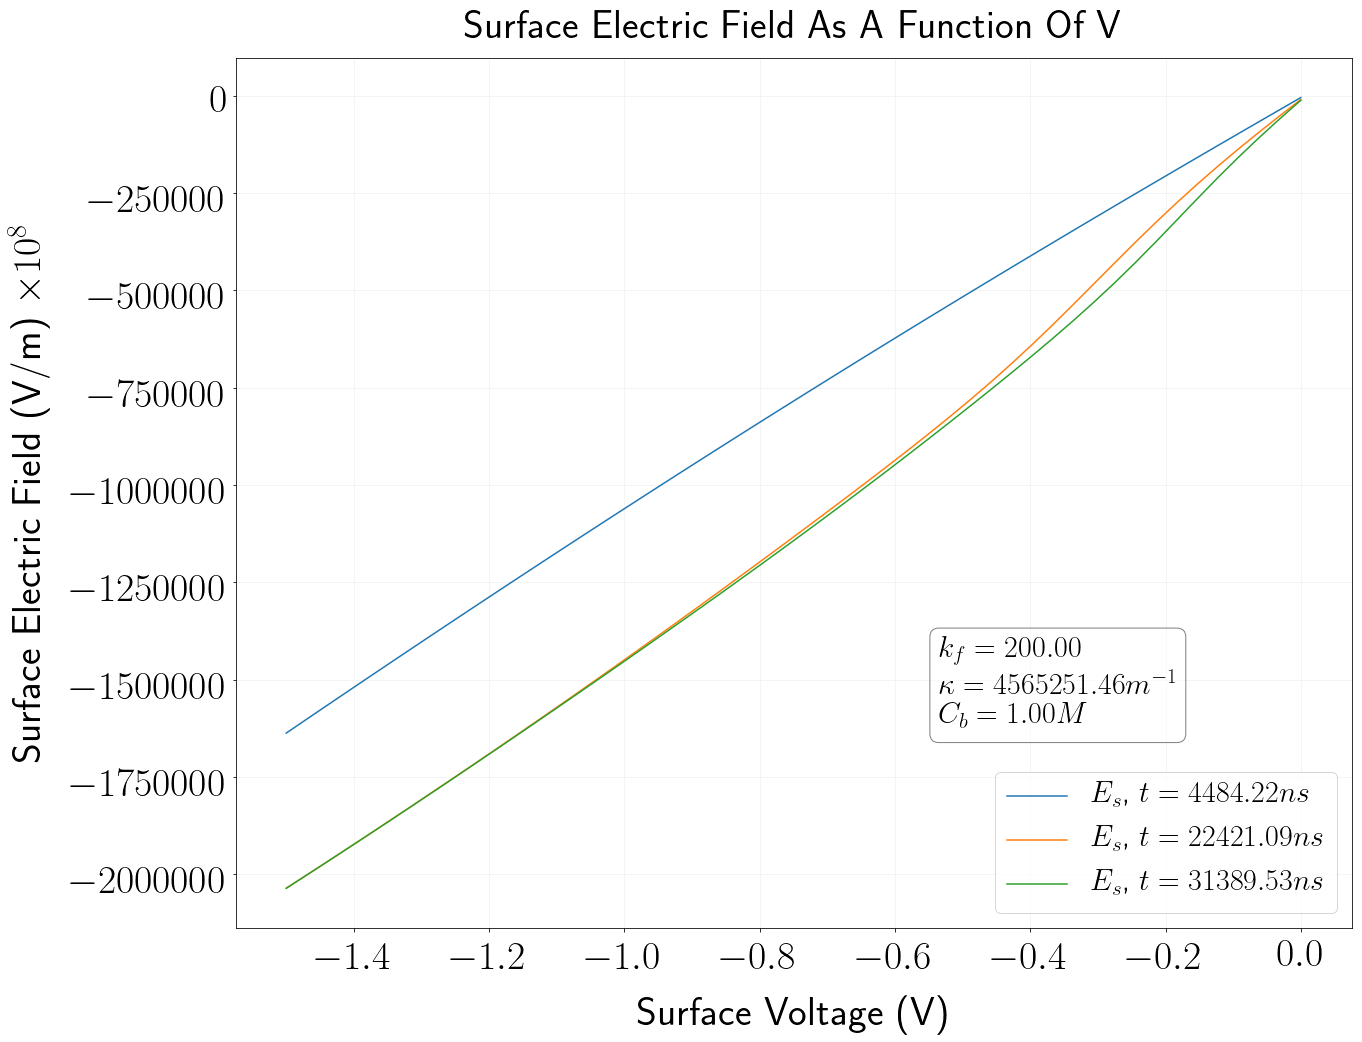

In [13]:
plt.figure()
plt.style.use('thesis')
skip = 4
plt.title('Surface Electric Field As A Function Of V', fontweight='bold')
plt.legend(loc='upper left')
for i in range(len(t)):
    n = int(t[i]/model3.dtau)
    plt.plot(v, surfE_v[0][i], label=r'$E_s$,  $t =%.2f ns$' % Decimal(t[i] * 1e9/ ( model4.D1 * model4.kappa ** 2 ) ))
plt.xlabel(r'Surface Voltage (V)')
plt.ylabel(r'Surface Electric Field (V/m) $\times 10^8$')
textstr = '\n'.join((
                r'$k_f=%.2f$' % Decimal(model4.kf),
                r'$\kappa=%.2f m^{-1}$' % Decimal(model4.kappa),
                r'$C_b=%.2f M$' % Decimal(1e3 * model4.Cb),))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.68, 0.3, textstr, transform=ax1.transAxes, fontsize=30, verticalalignment='top', bbox=props)

plt.legend(loc='lower right')
plt.savefig('../../img/surfaceEfield_v.eps', dpi=1000, fontweight='bold')
plt.show()

# Electric Field Fluctuations

We define the electric field fluctuations as

\begin{align}
\delta E(t) = \qty{E(t, x=0) - E_{SS}(x=0)}
\end{align}

In [14]:
Cbulk = 1e-3*np.array([0.01, 0.3, 0.7, 1.2])
deltaE = []
timewindows = []
#new time span is an array which contains the wanted time span in ns 
#(in this case 50 ns) and then transforms it to adimensional units via
# the factor D * kappa. This must be calculated first and the come back
#to this part of the code to reinsert the kappas.
new_time_span = 50 * 1e-9 * np.array([1/(2.0382813587050528 * 1e-10), 1/(2.9894793261007435* 1e-10),1/(4.484218989151115 * 1e-10)])
#new_time_span = 50 * 1e-9 * np.array([1/(4.484218989151115 * 1e-10), 2/(3 * 2.9894793261007435* 1e-10), 1/ (2.2 * 2.0382813587050528 * 1e-10)])
params2 = params
for C in Cbulk:
    params2['bulkConcentration'] = C
    kappa = np.sqrt(( params2["z"] * params2["Fa"] ) ** 2 * params2["bulkConcentration"] / ( params2["epsilon"] * params2["T"] * params2["R"] ))
    params2["timespan"] = ( params2["D1"] * params2["diffusionCoefficientScale"] * kappa ** 2 ) * 50 * 1e-9

    model5 = Model(params2)
    model5.build()
    timewindows.append( params2["timespan"] / ( model5.D1 * params2["diffusionCoefficientScale"] * model5.kappa ** 2 ) )
    deltaE.append(model5.E[:] - model5.E[-1])# * np.zeros(len(model5.E[1:,0])))


deltaE = np.array(deltaE)#/1e6


Build Complete
Build Complete
Build Complete
Build Complete


In [15]:
t = []
for i in range(len(Cbulk)):
     t.append(np.linspace(0, timewindows[i], len(deltaE[0])))



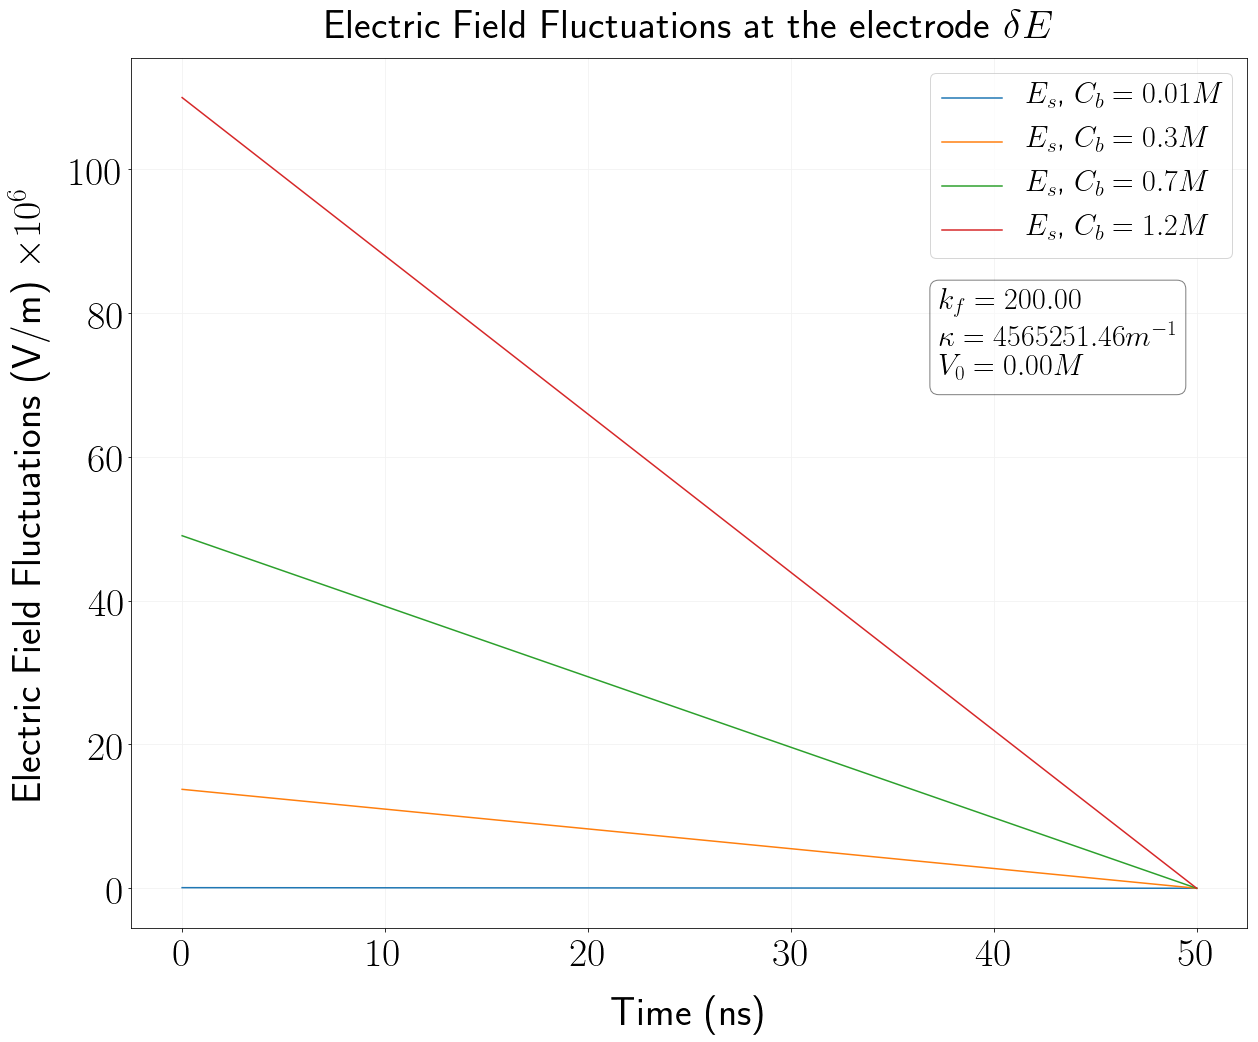

In [16]:
plt.figure(figsize=(20,16))
plt.grid(True, color= '#F2F2F2')
mw = 4
fs = 26
skip = 4

for i in range(len(Cbulk)):
    plt.plot(t[i][1:], deltaE[i][1:,0], '-', label=r'$E_s$,  $C_b ='+str(1e3*Cbulk[i])+'M$')
    
plt.xlabel(r'Time (ns)')
plt.ylabel(r'Electric Field Fluctuations (V/m) $\times 10^6$')
plt.title(r'Electric Field Fluctuations at the electrode $\delta E$')
textstr = '\n'.join((
                r'$k_f=%.2f$' % Decimal(model4.kf),
                r'$\kappa=%.2f m^{-1}$' % Decimal(model4.kappa),
                r'$V_0=%.2f M$' % Decimal(model4.V0),))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.68, 0.7, textstr, transform=ax1.transAxes, fontsize=30, verticalalignment='top', bbox=props)

plt.legend(loc='upper right')
plt.savefig('../../img/surfaceDeltaE.eps', dpi=1000, fontweight='bold')
plt.show()

In [17]:
from scipy.optimize import curve_fit 

def polinomial(x, a, c):
    b=1
    return a * x ** b + c

def exponencial(x, a, b):
    return a * np.exp(-b * x)

In [18]:
fitParams = []
pcovs = []
for i in range(len(t)):
    fit_params, pcov = curve_fit(polinomial, t[i][1:], deltaE[i][1:,0])
    fitParams.append(fit_params)
    pcovs.append(pcov)


No handles with labels found to put in legend.


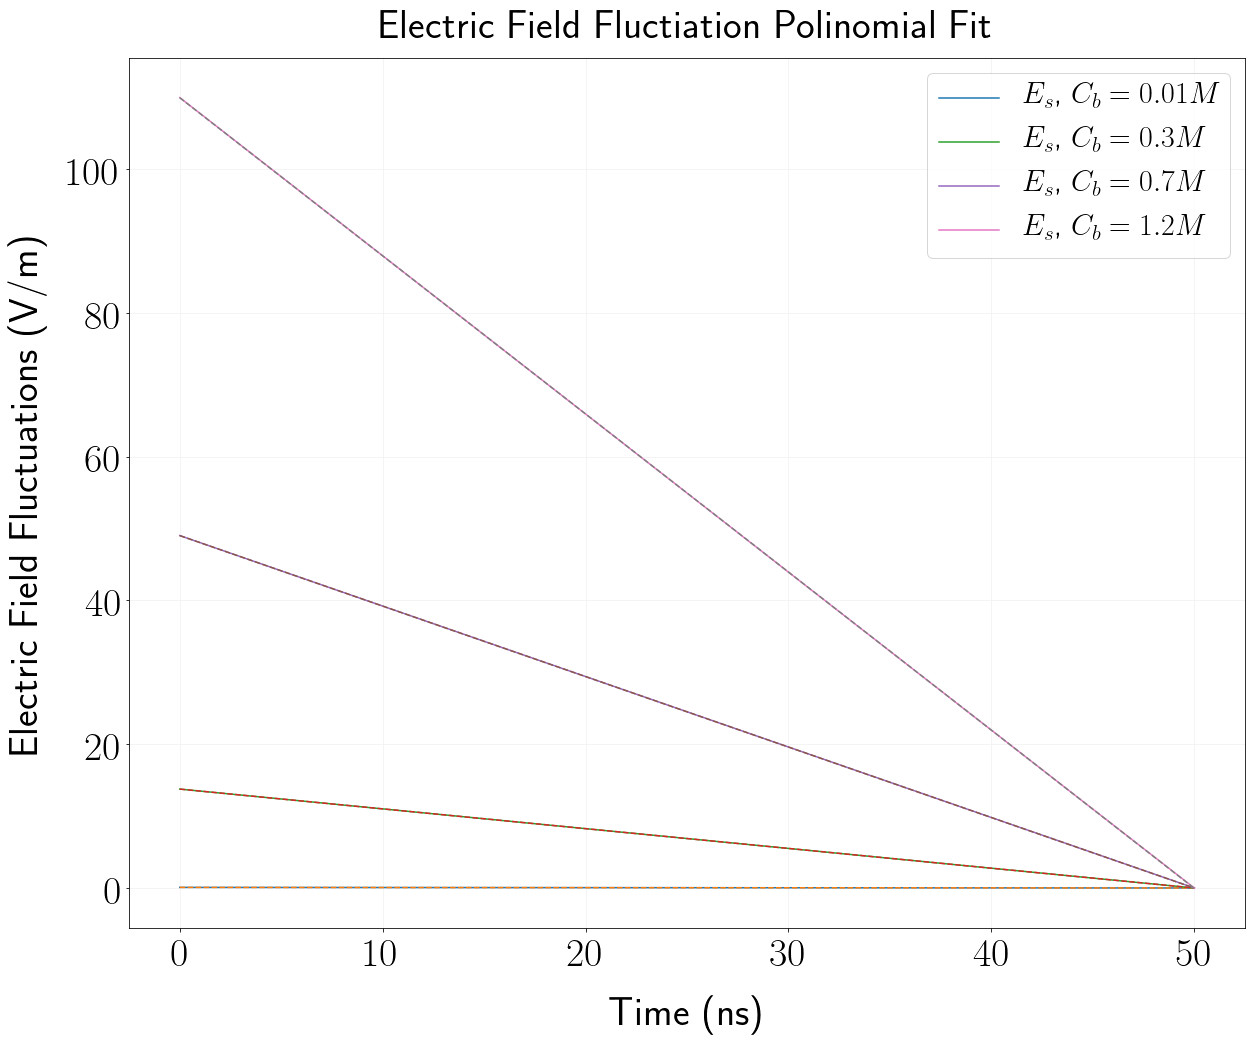

In [19]:

plt.figure(figsize=(20,16))

plt.title('Electric Field Fluctiation Polinomial Fit', fontweight='bold')
plt.legend(loc='upper left')



for i in range(len(Cbulk)):
    a = fitParams[i][0]
    b = fitParams[i][1]
    plt.plot(t[i][1:], deltaE[i][1:,0], '-', label=r'$E_s$,  $C_b ='+str(1e3*Cbulk[i])+'M$')
    plt.plot(t[i][1:], polinomial(t[i][1:],a,b) , '--')


plt.xlabel(r'Time (ns)')
plt.ylabel(r'Electric Field Fluctuations (V/m)')

textstr = '\n'.join((
                r'$k_f=%.2f$' % Decimal(model4.kf),
                r'$\kappa=%.2f m^{-1}$' % Decimal(model4.kappa),
                r'$V_0=%.2f M$' % Decimal(model4.V0),
                r'$C_b=%.2f M$' % Decimal(model4.Cb),),)

#props = dict(boxstyle='round', facecolor='white', alpha=0.5)
#plt.text(0.65, 0.1, textstr, transform=ax1.transAxes, fontsize=fs-4, verticalalignment='top', bbox=props)

plt.legend(loc='upper right')
plt.savefig('../../img/surfaceDeltaE_fitting.eps', dpi=1000, fontweight='bold')
plt.show()


In [20]:
fitParams

[array([-0.00167455,  0.08372766]),
 array([-0.27515156, 13.7574389 ]),
 array([-0.98050493, 49.02044176]),
 array([ -2.1993436 , 109.92873245])]